# Tasks

## Part 1: Load data and make a datetime index

[Data Source](https://docs.google.com/spreadsheets/d/e/2PACX-1vT_jChgNsQbHbg4TGepzIqk8XC9DTIKmyyxb1upo5cfZCgbfIUQc2ZC0YMzuU5uApP140Ob49KBjdqh/pub?gid=1198589591&single=true&output=csv)

- Convert the date column to datetime dtype.
- Set the date column as the index.
- Filter out only the required data. 
  - Keep only data from the year 2000 or later.
- Keep only the following features: 
  - precipitation
  - mean_temp
  - min_temp
  - max_temp
  - snow_depth
- Impute any missing values.

## Part 2: Answer Questions with Visualizations

For each of the following questions, make a new copy of the dataframe resampled to the correct frequency for the question.

Q1: What month had the most precipitation between 2000 through 2010?
- Resample the data as Monthly frequency.
- Find the date and corresponding value for the max precipitation.
- Plot the feature and time period that corresponds to the question.
- Determine the date and value for the most precipitation (the max precipitation).
- Add a vertical line at this date with a label that says the date (using date format: "April 2000") and the max precipitation value. Make sure to add a legend so that the label is visible.

__NOTE:__ Pandas' .plot method currently has a bug with 4-digit year axis labels. The tick labels misbehave when being formatted with matplotlib and will produce a mostly-blank axis with 1 year labeled. To get around this issue, first, create your fig and ax using plt.subplots(), then use pandas .plot method to plot this figure by adding the argument "ax=ax" to .plot().

*fig, ax = plt.subplots(figsize=(12,3))
df.plot(ax=ax)*

Q2: Which year between 2000-2020 had the coolest average temperature?
- Resample the data as Yearly frequency.
- Plot the feature and time period that corresponds to the question.
- Determine the date and value for the lowest mean temp.
- Add a vertical line at this date with a label that says the date (using date format: "2000") and the lowest mean temperature value.

# Imports

In [1]:
import pandas as pd
from datetime import datetime
from matplotlib import dates as mdates
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# Data Loading

In [2]:
filename = 'Data/london_weather_MODIFIED.csv'
df = pd.read_csv(filename)

# check
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              15341 non-null  int64  
 1   cloud_cover       14938 non-null  float64
 2   sunshine          14957 non-null  float64
 3   global_radiation  14939 non-null  float64
 4   max_temp          14951 non-null  float64
 5   mean_temp         14922 non-null  float64
 6   min_temp          14955 non-null  float64
 7   precipitation     14951 non-null  float64
 8   pressure          14953 non-null  float64
 9   snow_depth        13589 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 1.2 MB


In [3]:
df

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,19790104,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,19790105,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0
...,...,...,...,...,...,...,...,...,...,...
15336,20201227,1.0,0.9,32.0,7.5,7.5,7.6,2.0,98000.0,NaN
15337,20201228,7.0,3.7,38.0,3.6,1.1,-1.3,0.2,97370.0,NaN
15338,20201229,7.0,0.0,21.0,4.1,2.6,1.1,0.0,98830.0,NaN
15339,20201230,6.0,0.4,22.0,5.6,2.7,-0.1,0.0,100200.0,NaN


# Data Cleaning

## Convert the Date column to DateTime dtype

In [4]:
# convert column to new column of datetime objects
df['formatted_date'] = pd.to_datetime(df['date'])

print(df['formatted_date'].dtype)

datetime64[ns]


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              15341 non-null  int64         
 1   cloud_cover       14938 non-null  float64       
 2   sunshine          14957 non-null  float64       
 3   global_radiation  14939 non-null  float64       
 4   max_temp          14951 non-null  float64       
 5   mean_temp         14922 non-null  float64       
 6   min_temp          14955 non-null  float64       
 7   precipitation     14951 non-null  float64       
 8   pressure          14953 non-null  float64       
 9   snow_depth        13589 non-null  float64       
 10  formatted_date    15341 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(9), int64(1)
memory usage: 1.3 MB


In [6]:
df['formatted_date'].head(10)

0   1970-01-01 00:00:00.019790101
1   1970-01-01 00:00:00.019790102
2   1970-01-01 00:00:00.019790103
3   1970-01-01 00:00:00.019790104
4   1970-01-01 00:00:00.019790105
5   1970-01-01 00:00:00.019790106
6   1970-01-01 00:00:00.019790107
7   1970-01-01 00:00:00.019790108
8   1970-01-01 00:00:00.019790109
9   1970-01-01 00:00:00.019790110
Name: formatted_date, dtype: datetime64[ns]

In [7]:
# correct the formatting
df['formatted_date'] = pd.to_datetime(df['date'], format='%Y%m%d')

# check
print(df['formatted_date'].dtype)
df['formatted_date'].head(10)

datetime64[ns]


0   1979-01-01
1   1979-01-02
2   1979-01-03
3   1979-01-04
4   1979-01-05
5   1979-01-06
6   1979-01-07
7   1979-01-08
8   1979-01-09
9   1979-01-10
Name: formatted_date, dtype: datetime64[ns]

In [8]:
#Drop original date column and rename formatted date to date
df.drop(columns = 'date', inplace = True)
df.rename(columns={'formatted_date':'date'}, inplace=True)
df.head()

,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth,date
0,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0,1979-01-01
1,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0,1979-01-02
2,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0,1979-01-03
3,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0,1979-01-04
4,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0,1979-01-05


## Set Date as Index

In [9]:
df = df.set_index('date')
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 15341 entries, 1979-01-01 to 2020-12-31
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cloud_cover       14938 non-null  float64
 1   sunshine          14957 non-null  float64
 2   global_radiation  14939 non-null  float64
 3   max_temp          14951 non-null  float64
 4   mean_temp         14922 non-null  float64
 5   min_temp          14955 non-null  float64
 6   precipitation     14951 non-null  float64
 7   pressure          14953 non-null  float64
 8   snow_depth        13589 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


In [10]:
df

,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
date,,,,,,,,,
1979-01-01,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1979-01-02,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
1979-01-03,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
1979-01-04,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
1979-01-05,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0
...,...,...,...,...,...,...,...,...,...
2020-12-27,1.0,0.9,32.0,7.5,7.5,7.6,2.0,98000.0,NaN
2020-12-28,7.0,3.7,38.0,3.6,1.1,-1.3,0.2,97370.0,NaN
2020-12-29,7.0,0.0,21.0,4.1,2.6,1.1,0.0,98830.0,NaN


## Keep Data From Year 2000 & Beyond

In [11]:
df = df.loc['2000':]
df

,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
date,,,,,,,,,
2000-01-01,7.0,0.4,18.0,10.8,7.0,4.9,0.0,102450.0,0.0
2000-01-02,7.0,0.7,20.0,11.5,7.9,5.0,0.2,102530.0,0.0
2000-01-03,8.0,0.0,13.0,9.5,9.4,7.2,6.0,101860.0,0.0
2000-01-04,5.0,2.9,34.0,11.0,7.0,4.4,0.2,101480.0,0.0
2000-01-05,5.0,1.3,25.0,10.8,6.4,1.9,0.8,101420.0,0.0
...,...,...,...,...,...,...,...,...,...
2020-12-27,1.0,0.9,32.0,7.5,7.5,7.6,2.0,98000.0,NaN
2020-12-28,7.0,3.7,38.0,3.6,1.1,-1.3,0.2,97370.0,NaN
2020-12-29,7.0,0.0,21.0,4.1,2.6,1.1,0.0,98830.0,NaN


## Keep Certain Features

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7671 entries, 2000-01-01 to 2020-12-31
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cloud_cover       7282 non-null   float64
 1   sunshine          7287 non-null   float64
 2   global_radiation  7282 non-null   float64
 3   max_temp          7281 non-null   float64
 4   mean_temp         7252 non-null   float64
 5   min_temp          7285 non-null   float64
 6   precipitation     7281 non-null   float64
 7   pressure          7284 non-null   float64
 8   snow_depth        5919 non-null   float64
dtypes: float64(9)
memory usage: 599.3 KB


In [13]:
keep_these = ['precipitation', 'mean_temp', 'min_temp', 'max_temp', 'snow_depth']
df = df[keep_these]
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7671 entries, 2000-01-01 to 2020-12-31
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   precipitation  7281 non-null   float64
 1   mean_temp      7252 non-null   float64
 2   min_temp       7285 non-null   float64
 3   max_temp       7281 non-null   float64
 4   snow_depth     5919 non-null   float64
dtypes: float64(5)
memory usage: 359.6 KB


In [14]:
df

,precipitation,mean_temp,min_temp,max_temp,snow_depth
date,,,,,
2000-01-01,0.0,7.0,4.9,10.8,0.0
2000-01-02,0.2,7.9,5.0,11.5,0.0
2000-01-03,6.0,9.4,7.2,9.5,0.0
2000-01-04,0.2,7.0,4.4,11.0,0.0
2000-01-05,0.8,6.4,1.9,10.8,0.0
...,...,...,...,...,...
2020-12-27,2.0,7.5,7.6,7.5,NaN
2020-12-28,0.2,1.1,-1.3,3.6,NaN
2020-12-29,0.0,2.6,1.1,4.1,NaN


## Impute any missing values.

In [15]:
# Missing value count
df.isna().sum()

precipitation     390
mean_temp         419
min_temp          386
max_temp          390
snow_depth       1752
dtype: int64

In [16]:
for col in df:
    df[col] = df[col].interpolate()

In [17]:
# Re-Check
df.isna().sum()

precipitation    0
mean_temp        0
min_temp         0
max_temp         0
snow_depth       0
dtype: int64

# Q1: Month with the Most Precipitation from 2000 - 2010?

In [18]:
# Filterdf_Q1 for appropriate column
df_Q1 = df['precipitation'].copy()
df_Q1.head()

date
2000-01-01    0.0
2000-01-02    0.2
2000-01-03    6.0
2000-01-04    0.2
2000-01-05    0.8
Name: precipitation, dtype: float64

In [19]:
# Set range of years from 2000-2010
df_Q1 = df_Q1.loc['2000':'2010']
df_Q1

date
2000-01-01    0.0
2000-01-02    0.2
2000-01-03    6.0
2000-01-04    0.2
2000-01-05    0.8
             ... 
2010-12-27    5.0
2010-12-28    0.4
2010-12-29    1.4
2010-12-30    0.0
2010-12-31    0.0
Name: precipitation, Length: 4018, dtype: float64

In [20]:
# resample with monthly frequency; take mean of month
df_Q1 = df_Q1.resample("MS").mean()

# check
df_Q1

date
2000-01-01    0.467742
2000-02-01    2.234483
2000-03-01    0.448387
2000-04-01    2.750000
2000-05-01    2.516129
                ...   
2010-08-01    2.980645
2010-09-01    1.486667
2010-10-01    2.035484
2010-11-01    1.066667
2010-12-01    0.687097
Freq: MS, Name: precipitation, Length: 132, dtype: float64

In [21]:
# Find Date of Max Value
max_precip_date = df_Q1.idxmax()

# check
print(max_precip_date)

df_Q1.loc[max_precip_date]

2000-10-01 00:00:00


4.925806451612903

## Plot results

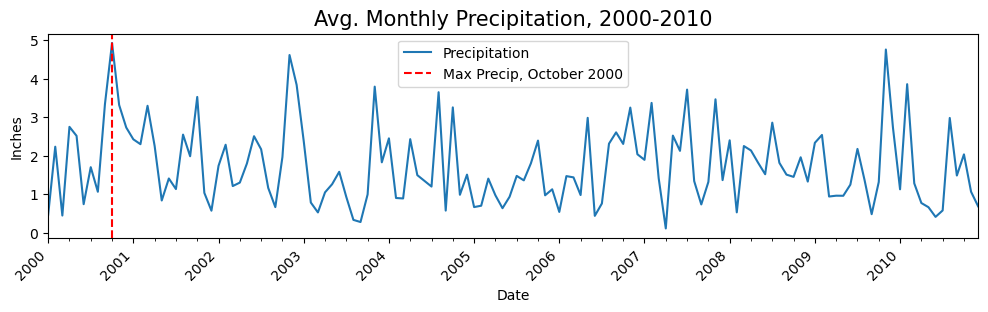

In [29]:
fig, ax = plt.subplots(figsize = (12, 3))


df_Q1.plot(ax = ax)


fig.autofmt_xdate(which = 'major', rotation = 45)

ax.set_title('Avg. Monthly Precipitation, 2000-2010', fontsize = 15)
ax.set_ylabel('Inches')
ax.set_xlabel('Date')
   
    
ax.axvline(x = max_precip_date, color = 'r', linestyle = '--',
          label = f'Max Precip, {max_precip_date:%B %Y}')


handles, labels = ax.get_legend_handles_labels()
labels = [label.title() for label in labels]


ax.legend(handles,
          labels,
          loc = 'best');

# Q2: Year with the Coldest Avg Temp from 2000 - 2020?

Q2: Which year between 2000-2020 had the coolest average temperature?
- Resample the data as Yearly frequency.
- Plot the feature and time period that corresponds to the question.
- Determine the date and value for the lowest mean temp.
- Add a vertical line at this date with a label that says the date (using date format: "2000") and the lowest mean temperature value.

In [30]:
# Filter df_Q2 for appropriate column
df_Q2 = df['mean_temp'].copy()
df_Q2.head()

date
2000-01-01    7.0
2000-01-02    7.9
2000-01-03    9.4
2000-01-04    7.0
2000-01-05    6.4
Name: mean_temp, dtype: float64

In [34]:
# resample with monthly frequency; take mean of month
df_Q2 = df_Q2.resample("AS").mean()

# check
df_Q2

date
2000-01-01    11.561717
2001-01-01    11.294354
2002-01-01    12.061937
2003-01-01    12.075566
2004-01-01    11.885480
2005-01-01    11.781285
2006-01-01    12.245974
2007-01-01    11.919156
2008-01-01    11.309113
2009-01-01    11.687963
2010-01-01    10.627629
2011-01-01    12.349363
2012-01-01    11.270760
2013-01-01    11.116827
2014-01-01    12.631854
2015-01-01    12.077225
2016-01-01    11.884301
2017-01-01    12.212584
2018-01-01    12.444524
2019-01-01    12.179068
2020-01-01    12.713742
Freq: AS-JAN, Name: mean_temp, dtype: float64

In [35]:
# Set range of years from 2000-2020
df_Q2 = df_Q2.loc['2000':'2020']
df_Q2

date
2000-01-01    11.561717
2001-01-01    11.294354
2002-01-01    12.061937
2003-01-01    12.075566
2004-01-01    11.885480
2005-01-01    11.781285
2006-01-01    12.245974
2007-01-01    11.919156
2008-01-01    11.309113
2009-01-01    11.687963
2010-01-01    10.627629
2011-01-01    12.349363
2012-01-01    11.270760
2013-01-01    11.116827
2014-01-01    12.631854
2015-01-01    12.077225
2016-01-01    11.884301
2017-01-01    12.212584
2018-01-01    12.444524
2019-01-01    12.179068
2020-01-01    12.713742
Freq: AS-JAN, Name: mean_temp, dtype: float64

In [38]:
# Find Date of Max Value
min_temp = df_Q2.idxmin()

# check
print(min_temp)

df_Q2.loc[min_temp]

2010-01-01 00:00:00


10.62762928827445

## Plot results

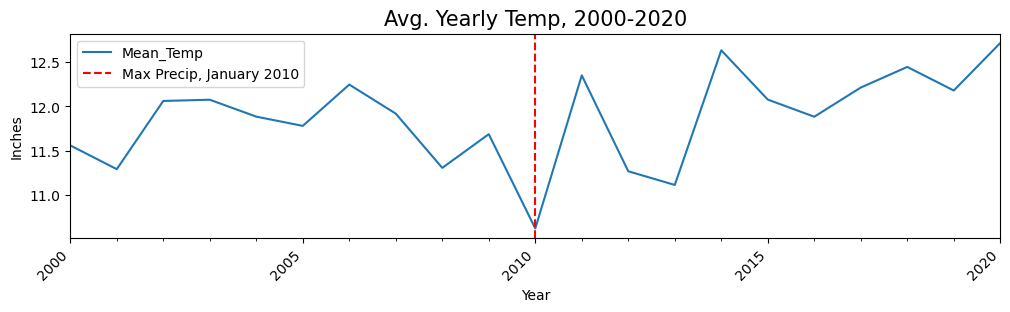

In [41]:
fig, ax = plt.subplots(figsize = (12, 3))


df_Q2.plot(ax = ax)


fig.autofmt_xdate(which = 'major', rotation = 45)

ax.set_title('Avg. Yearly Temp, 2000-2020', fontsize = 15)
ax.set_ylabel('Inches')
ax.set_xlabel('Year')
   
    
ax.axvline(x = min_temp, color = 'r', linestyle = '--',
          label = f'Min Temp, {min_temp:%B %Y}')


handles, labels = ax.get_legend_handles_labels()
labels = [label.title() for label in labels]


ax.legend(handles,
          labels,
          loc = 'best');